# Purpose
This folder is made to test [`Rasterio`](https://rasterio.readthedocs.io/) and see if it should be used instead of Pillow. Results here will help us decide the future implementation of this project.

# Installation

1) Install Anaconda/miniconda (if not already installed) 
    - Here's miniconda link: https://docs.conda.io/en/latest/miniconda.html
    - Make sure to **check the box** to "Add Miniconda to PATH" during installation.
    - Restart your terminal after installation.
2) create an environment in conda from the environment file provided:
```bash
    conda env create -f environment.yml
    conda activate rasterenv
```
3) Register conda env for jupyter notebooks (do it while in environment):
```bash
    conda install ipykernel
    python -m ipykernel install --user --name=rasterenv --display-name "Python (rasterenv)"
```


# test code:

Width: 10928
Height: 10654
CRS: EPSG:3413
Bounds: BoundingBox(left=-1649412.0, bottom=4067842.0, right=-1627556.0, top=4089150.0)


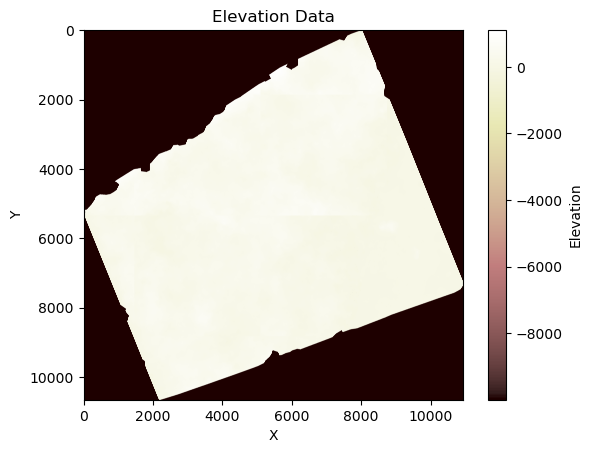

Total area:  133554012


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# below is path to data to test on
test_file = "../data/SETSM_s2s041_WV02_20190307_103001008C5DEA00_103001008ED5D700_2m_seg1/SETSM_s2s041_WV02_20190307_103001008C5DEA00_103001008ED5D700_2m_seg1_dem.tif"

with rasterio.open(test_file) as dataset:
    print("Width:", dataset.width)
    print("Height:", dataset.height)
    print("CRS:", dataset.crs)
    print("Bounds:", dataset.bounds)

    band1 = dataset.read(1)  # Read the first band into an array

    plt.imshow(band1, cmap='gray')
    plt.colorbar(label='Elevation')
    plt.title('Elevation Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    notData = dataset.nodata

    validData = band1 != notData
    print("Total area: ", validData.sum() * 2)
